In [0]:
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 7777 # You can select anything up to 60,000

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [0]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128))
model.add(Dropout(0.25))
model.add(Dense(10, activation=tf.nn.softmax))

In [13]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

model.fit(x=x_train,y=y_train, epochs=10, callbacks=[cp_callback])

Epoch 1/10
60000/60000 [==============================] - 287s 5ms/step - loss: 0.1155 - acc: 0.9648
Epoch 2/10
60000/60000 [==============================] - 283s 5ms/step - loss: 0.0522 - acc: 0.9839
Epoch 3/10
60000/60000 [==============================] - 284s 5ms/step - loss: 0.0394 - acc: 0.9876
Epoch 4/10
60000/60000 [==============================] - 280s 5ms/step - loss: 0.0311 - acc: 0.9899
Epoch 5/10
60000/60000 [==============================] - 282s 5ms/step - loss: 0.0262 - acc: 0.9919
Epoch 6/10
60000/60000 [==============================] - 284s 5ms/step - loss: 0.0213 - acc: 0.9928
Epoch 7/10
60000/60000 [==============================] - 288s 5ms/step - loss: 0.0196 - acc: 0.9939
Epoch 8/10
60000/60000 [==============================] - 286s 5ms/step - loss: 0.0176 - acc: 0.9942
Epoch 9/10
60000/60000 [==============================] - 285s 5ms/step - loss: 0.0161 - acc: 0.9948
Epoch 10/10
60000/60000 [==============================] - 287s 5ms/step - loss: 0.0152 - a

In [14]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 11s 1ms/step


[0.04422406168698817, 0.9884]

1


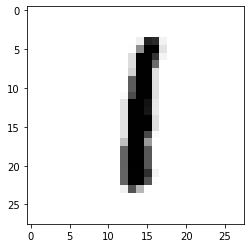

In [16]:
image_index = 768
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [0]:
model.save('mnist.h5')

In [18]:
converter = tf.lite.TFLiteConverter.from_keras_model_file('mnist.h5')
tflite_model = converter.convert()
open('mnist.tflite', 'wb').write(tflite_model)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 8 variables.
INFO:tensorflow:Converted 8 variables to const ops.


9594136

In [0]:
try:
    from google.colab import files
    files.download('mnist.tflite')
except:
    print("Skip downloading")